In [8]:
#recall our previously saved files
%store -r Yrg
%store -r Xrg_arrayRol 
%store -r selected_RGindexes 

%store -r Xrg_arrayRol_sk 
%store -r selected_RGindexes_sk 

In [9]:
#convert Y to boolean
Yrg = Yrg.map({'S': 1, 'B': 0})
Yrg

0      0
1      0
2      1
3      1
4      0
      ..
557    1
558    0
559    0
560    1
561    1
Name: Condition, Length: 562, dtype: int64

In [10]:
#Importing Packages

import sys
sys.path.append("..")
####
from sklearn.ensemble import RandomForestClassifier # a ML method
from sklearn.metrics import accuracy_score, precision_score
import numpy as np
from source.utils import split #  a pre-defined function to split the data into training and testing|

In [11]:
# ___Cell no. 4___

acc_list_rg = [] # a list to save the accuracy score for the 4 different datasets we have
prec_list_rg = [] # a list to save the precision score for the 4 different datasets we have
for x_rol,boolInd_rg in zip (Xrg_arrayRol, selected_RGindexes):
    print(x_rol.shape)
    print(boolInd_rg.shape) # a boolean array to select the best 10 features
    Xrgtrain, Xrgtest, Yrgtrain, Yrgtest  = split( x_rol.values[:,boolInd_rg], Yrg )
    print("X training shape:" + str(Xrgtrain.shape))
    print("Notice that we reduced the number of features from " + str(x_rol.shape[1]) + " to " + str(Xrgtrain.shape[1]))
    RF_rg = RandomForestClassifier(random_state=0, n_estimators=500) #defining the model
    RF_rg.fit(Xrgtrain, Yrgtrain) # training the machine learning model
    yrg_pred = RF_rg.predict(Xrgtest)
    
#### Calculating the scores
    prec_rg = precision_score(Yrgtest.values, yrg_pred)
    print("precision score= "+str(prec_rg))

#### appending the score to a list
    prec_list_rg.append(prec_rg) # append the precision score to a list.
    
#### Done
    print('##########')

(562, 207)
(207,)
X training shape:(393, 10)
Notice that we reduced the number of features from 207 to 10
precision score= 0.7222222222222222
##########
(562, 69)
(69,)
X training shape:(393, 10)
Notice that we reduced the number of features from 69 to 10
precision score= 0.71
##########
(562, 41)
(41,)
X training shape:(393, 10)
Notice that we reduced the number of features from 41 to 10
precision score= 0.6699029126213593
##########
(562, 20)
(20,)
X training shape:(393, 10)
Notice that we reduced the number of features from 20 to 10
precision score= 0.69
##########


In [12]:
# ___Cell no. 4___

acc_list_rg_sk = [] # a list to save the accuracy score for the 4 different datasets we have
prec_list_rg_sk = [] # a list to save the precision score for the 4 different datasets we have
for x_rol_sk,boolInd_rg_sk in zip (Xrg_arrayRol_sk, selected_RGindexes_sk):
    print(x_rol_sk.shape)
    print(boolInd_rg_sk.shape) # a boolean array to select the best 10 features
    Xrgtrain_sk, Xrgtest_sk, Yrgtrain_sk, Yrgtest_sk  = split( x_rol_sk.values[:,boolInd_rg_sk], Yrg )
    print("X training shape:" + str(Xrgtrain_sk.shape))
    print("Notice that we reduced the number of features from " + str(x_rol_sk.shape[1]) + " to " + str(Xrgtrain_sk.shape[1]))
    RF_rg_sk = RandomForestClassifier(random_state=0, n_estimators=500) #defining the model
    RF_rg_sk.fit(Xrgtrain_sk, Yrgtrain_sk) # training the machine learning model
    yrg_pred_sk = RF_rg_sk.predict(Xrgtest_sk)
    
#### Calculating the scores
    prec_rg_sk = precision_score(Yrgtest_sk.values, yrg_pred_sk)
    print("precision score= "+str(prec_rg_sk))

#### appending the score to a list
    prec_list_rg_sk.append(prec_rg_sk) # append the precision score to a list.
    
#### Done
    print('##########')

(562, 207)
(207,)
X training shape:(393, 10)
Notice that we reduced the number of features from 207 to 10
precision score= 0.6702127659574468
##########
(562, 69)
(69,)
X training shape:(393, 10)
Notice that we reduced the number of features from 69 to 10
precision score= 0.7216494845360825
##########
(562, 41)
(41,)
X training shape:(393, 10)
Notice that we reduced the number of features from 41 to 10
precision score= 0.7789473684210526
##########
(562, 20)
(20,)
X training shape:(393, 10)
Notice that we reduced the number of features from 20 to 10
precision score= 0.7555555555555555
##########


Now let us compare the Precision scores


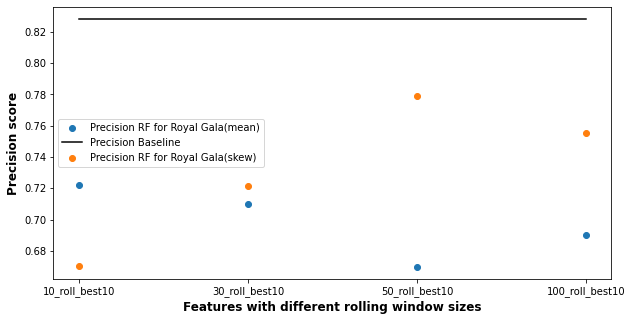

In [18]:
import matplotlib.pyplot as plt

print("Now let us compare the Precision scores")
plt.figure(figsize=(10, 5))

mystring = "roll_"
    
# We make the second curve dashed so that it doesn't cover up the first
plt.scatter([ str(s) + "_roll_best10" for s in [10, 30, 50, 100] ], prec_list_rg, label = "Precision RF for Royal Gala(mean)")
plt.plot([ str(s) + "_roll_best10" for s in [10, 30, 50, 100] ], [0.828]*len(prec_list_rg), label = "Precision Baseline", color = "black")

plt.scatter([ str(s) + "_roll_best10" for s in [10, 30, 50, 100] ], prec_list_rg_sk, label = "Precision RF for Royal Gala(skew)")

# plt.title("GS apples", fontweight ='bold', fontsize =12)    
plt.xlabel("Features with different rolling window sizes", fontweight ='bold', fontsize =12)
plt.ylabel("Precision score", fontweight ='bold', fontsize =12)
#plt.ylim([.6,.9])

plt.legend()

plt.show()

In [17]:
%store prec_list_rg
%store prec_list_rg_sk

Stored 'prec_list_rg' (list)
Stored 'prec_list_rg_sk' (list)
